## Imports

In [190]:
import numpy as np
import pandas as pd

import scipy
from scipy.io import arff
from scipy import stats
import joblib

scipy.optimize

<module 'scipy.optimize' from 'C:\\Users\\nroy0\\anaconda3\\lib\\site-packages\\scipy\\optimize\\__init__.py'>

In [191]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_validate, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

## Load Data

In [195]:
data = arff.loadarff('seismic-bumps.arff')

In [7]:
df = pd.DataFrame(data[0])

In [8]:
df.shape

(2584, 19)

In [9]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,b'a',b'a',b'N',15180.0,48.0,-72.0,-72.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
1,b'a',b'a',b'N',14720.0,33.0,-70.0,-79.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,b'0'
2,b'a',b'a',b'N',8050.0,30.0,-81.0,-78.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'
3,b'a',b'a',b'N',28820.0,171.0,-23.0,40.0,b'a',1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,b'0'
4,b'a',b'a',b'N',12640.0,57.0,-63.0,-52.0,b'a',0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


In [10]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

## Data Preprocessing

### Categorizing columns in types of features and labels

In [1]:
label = 'class'
col_list_categorical = ['seismic', 'seismoacoustic', 'shift', 'ghazard']
col_list_numerical = ['genergy', 'gpuls', 'gdenergy', 'gdpuls', 'energy', 'maxenergy']
col_list_discrete = ['nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89']
len([label]) + len(col_list_categorical) + len(col_list_discrete) + len(col_list_numerical)

19

### Decoding bytes to utf-8

In [12]:
for col in df.columns:
    if col in col_list_categorical + [label]:
        df[col] = df[col].str.decode("utf-8")
        if col == label:
            print(df[col].value_counts())
            df[col] = df[col].astype(int)

0    2414
1     170
Name: class, dtype: int64


In [13]:
df.dtypes

seismic            object
seismoacoustic     object
shift              object
genergy           float64
gpuls             float64
gdenergy          float64
gdpuls            float64
ghazard            object
nbumps            float64
nbumps2           float64
nbumps3           float64
nbumps4           float64
nbumps5           float64
nbumps6           float64
nbumps7           float64
nbumps89          float64
energy            float64
maxenergy         float64
class               int32
dtype: object

In [14]:
df.head()

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180.0,48.0,-72.0,-72.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,a,a,N,14720.0,33.0,-70.0,-79.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0
2,a,a,N,8050.0,30.0,-81.0,-78.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,a,a,N,28820.0,171.0,-23.0,40.0,a,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0
4,a,a,N,12640.0,57.0,-63.0,-52.0,a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [15]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seismic         2584 non-null   object 
 1   seismoacoustic  2584 non-null   object 
 2   shift           2584 non-null   object 
 3   genergy         2584 non-null   float64
 4   gpuls           2584 non-null   float64
 5   gdenergy        2584 non-null   float64
 6   gdpuls          2584 non-null   float64
 7   ghazard         2584 non-null   object 
 8   nbumps          2584 non-null   float64
 9   nbumps2         2584 non-null   float64
 10  nbumps3         2584 non-null   float64
 11  nbumps4         2584 non-null   float64
 12  nbumps5         2584 non-null   float64
 13  nbumps6         2584 non-null   float64
 14  nbumps7         2584 non-null   float64
 15  nbumps89        2584 non-null   float64
 16  energy          2584 non-null   float64
 17  maxenergy       2584 non-null   f

In [16]:
df.describe()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.0,2584.0,2584.0,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,12.375774,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,0.0,0.0,0.0,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,80.319051,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,0.0,0.0,0.0,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,1.166000e+04,190.000000,-37.000000,-36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,5.283250e+04,669.000000,38.000000,30.250000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,2600.000000,2000.000000,0.000000
max,2.595650e+06,4518.000000,1245.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,0.0,0.0,0.0,402000.000000,400000.000000,1.000000


### Target Distributions Check

In [17]:
df['class'].value_counts() * 100 /len(df['class']) 

0    93.421053
1     6.578947
Name: class, dtype: float64

In [18]:
for col in col_list_categorical:
    print(df[col].value_counts())

a    1682
b     902
Name: seismic, dtype: int64
a    1580
b     956
c      48
Name: seismoacoustic, dtype: int64
W    1663
N     921
Name: shift, dtype: int64
a    2342
b     212
c      30
Name: ghazard, dtype: int64


In [19]:
df.columns

Index(['seismic', 'seismoacoustic', 'shift', 'genergy', 'gpuls', 'gdenergy',
       'gdpuls', 'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4',
       'nbumps5', 'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy',
       'class'],
      dtype='object')

In [20]:
# Dataframe Checkpoint
df_raw = df.copy(deep=True)

### Categorical Feature Encoding

#### Contingency tables for categorical variables

In [21]:
df.seismic.value_counts()

a    1682
b     902
Name: seismic, dtype: int64

In [22]:
data_crosstab = pd.crosstab(df['seismic'], df[label], colnames=['class'])
data_crosstab

class,0,1
seismic,,
a,1599,83
b,815,87


In [23]:
data_crosstab = pd.crosstab(df['seismoacoustic'], df[label], colnames=['class'])
data_crosstab

class,0,1
seismoacoustic,,
a,1479,101
b,890,66
c,45,3


In [24]:
101/1479 , 66/890

(0.068289384719405, 0.07415730337078652)

Not much bias

In [25]:
data_crosstab = pd.crosstab(df[label], df['seismic'])
data_crosstab

seismic,a,b
class,,
0,1599,815
1,83,87


Larger fraction in (b | 1)

In [26]:
data_crosstab = pd.crosstab(df[label], df['shift'])
data_crosstab.reset_index()

shift,class,N,W
0,0,904,1510
1,1,17,153


In [27]:
17/904 , 153/1510

(0.018805309734513276, 0.10132450331125828)

10% of the (W | 0) is 1.

In [28]:
data_crosstab = pd.crosstab(df[label], df['ghazard'])
data_crosstab

ghazard,a,b,c
class,,,
0,2186,198,30
1,156,14,0


In [29]:
2186/156, 198/14

(14.012820512820513, 14.142857142857142)

Similar ratios

#### One-hot encoder

In [30]:
def one_hot_encoder(col_name, df):
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(drop='if_binary', sparse=False)
    try:
        encoded_array = label_encoder.fit_transform(df[col_name])
#         SKLEARN IMPLEMENTATION
        encoded_array_reshaped = encoded_array.reshape(len(encoded_array), 1)
        one_hot_encoded_array = onehot_encoder.fit_transform(encoded_array_reshaped)
#         one_hot_encoded_array = to_categorical(encoded_array)
        print(one_hot_encoded_array)
        num_features = one_hot_encoded_array.shape[1]
        print("Number of encoded columns to add: ", num_features)
        new_enc_col_names = [col + '_enc_' + str(num) for num in range(0, num_features)] 
        df_enc = pd.DataFrame(one_hot_encoded_array)
        print("Shape of encoded df: ", df_enc.shape)
        df_enc.columns = new_enc_col_names
        print("New column names: ", new_enc_col_names)
        df = pd.concat([df, df_enc], axis=1)
        df.drop(columns=col, inplace=True)
        return df
    except Exception as e:
        print(e)
        print("Error in encoding feature : " + col_name)

In [31]:
for col in col_list_categorical:
    df = one_hot_encoder(col, df)
df.shape

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
Number of encoded columns to add:  1
Shape of encoded df:  (2584, 1)
New column names:  ['seismic_enc_0']
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Number of encoded columns to add:  3
Shape of encoded df:  (2584, 3)
New column names:  ['seismoacoustic_enc_0', 'seismoacoustic_enc_1', 'seismoacoustic_enc_2']
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
Number of encoded columns to add:  1
Shape of encoded df:  (2584, 1)
New column names:  ['shift_enc_0']
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
Number of encoded columns to add:  3
Shape of encoded df:  (2584, 3)
New column names:  ['ghazard_enc_0', 'ghazard_enc_1', 'ghazard_enc_2']


(2584, 23)

In [32]:
df.head()

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class,seismic_enc_0,seismoacoustic_enc_0,seismoacoustic_enc_1,seismoacoustic_enc_2,shift_enc_0,ghazard_enc_0,ghazard_enc_1,ghazard_enc_2
0,15180.0,48.0,-72.0,-72.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,14720.0,33.0,-70.0,-79.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8050.0,30.0,-81.0,-78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,28820.0,171.0,-23.0,40.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3000.0,3000.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,12640.0,57.0,-63.0,-52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genergy               2584 non-null   float64
 1   gpuls                 2584 non-null   float64
 2   gdenergy              2584 non-null   float64
 3   gdpuls                2584 non-null   float64
 4   nbumps                2584 non-null   float64
 5   nbumps2               2584 non-null   float64
 6   nbumps3               2584 non-null   float64
 7   nbumps4               2584 non-null   float64
 8   nbumps5               2584 non-null   float64
 9   nbumps6               2584 non-null   float64
 10  nbumps7               2584 non-null   float64
 11  nbumps89              2584 non-null   float64
 12  energy                2584 non-null   float64
 13  maxenergy             2584 non-null   float64
 14  class                 2584 non-null   int32  
 15  seismic_enc_0        

Notice that after one hot encoding, thate object types changed to floats.

### Numeric Feature Scaling

In [34]:
df_corr = df[col_list_numerical].corr()

In [35]:
df_corr

,genergy,gpuls,gdenergy,gdpuls,energy,maxenergy
genergy,1.000000,0.748020,0.048514,0.071554,0.080828,0.064405
gpuls,0.748020,1.000000,0.293036,0.382906,0.187350,0.164263
gdenergy,0.048514,0.293036,1.000000,0.811944,0.105971,0.108572
gdpuls,0.071554,0.382906,0.811944,1.000000,0.143277,0.143646
energy,0.080828,0.187350,0.105971,0.143277,1.000000,0.989547
maxenergy,0.064405,0.164263,0.108572,0.143646,0.989547,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text yticklabel objects>)

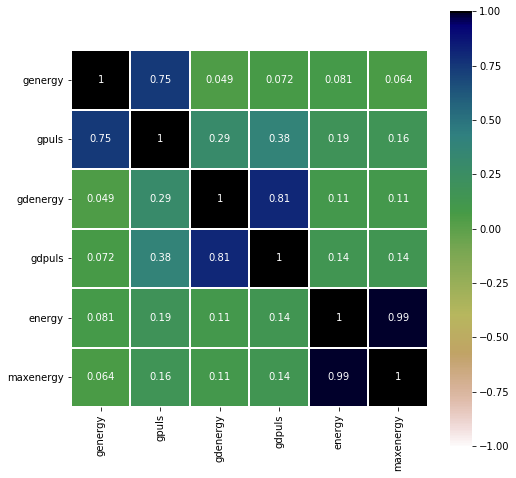

In [36]:
plt.figure(figsize=[8, 8])
sns.heatmap(data=df_corr, vmin=-1, vmax=1, cmap='gist_earth_r', annot=True, square=True, linewidths=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

#### genergy and gpuls

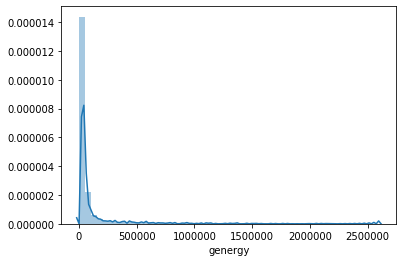

In [37]:
sns.distplot(df['genergy'], hist=True)

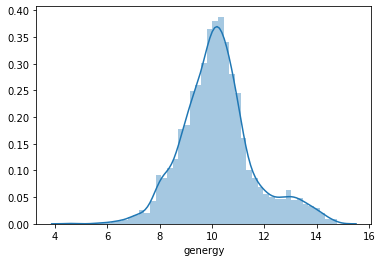

In [38]:
sns.distplot(np.log(df['genergy']), hist=True)

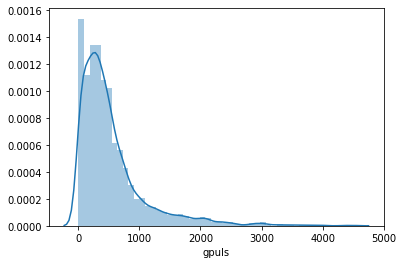

In [39]:
sns.distplot(df['gpuls'], hist=True)

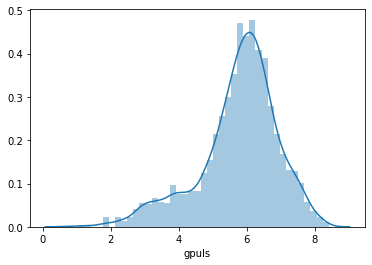

In [40]:
sns.distplot(np.log(df['gpuls']), hist=True)

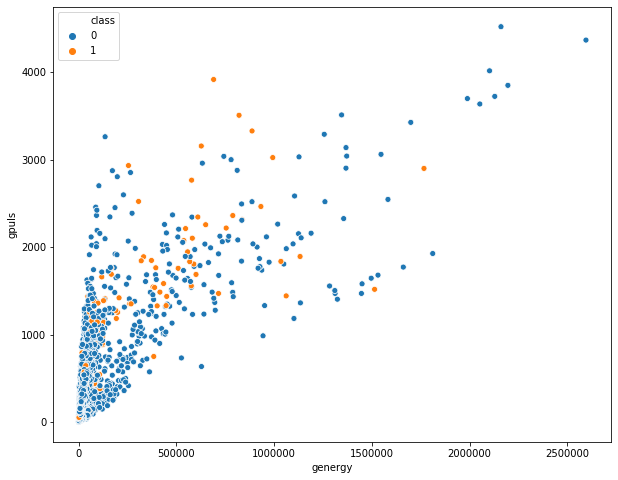

In [41]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='genergy', y='gpuls', hue='class', data=df)

In [42]:
# Applying log transform

df['log_t_genergy'] = np.log(df['genergy'])
df['log_t_gpuls'] = np.log(df['gpuls'])

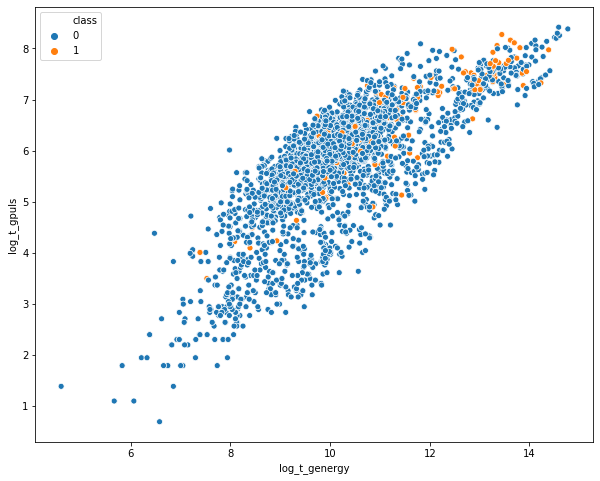

In [43]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='log_t_genergy', y='log_t_gpuls', hue='class', data=df)

In [44]:
df.drop(columns=['log_t_genergy', 'log_t_gpuls'], inplace=True)

#### gdenergy and gdpuls

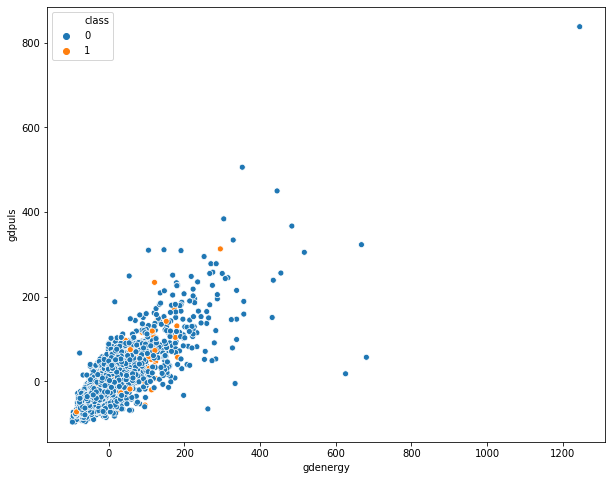

In [45]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='gdenergy', y='gdpuls', hue='class', data=df)

There are negative shifts in gdenergy and gdpuls because of which log transformation is not going to be the best choice. So, trying out square root transformation.

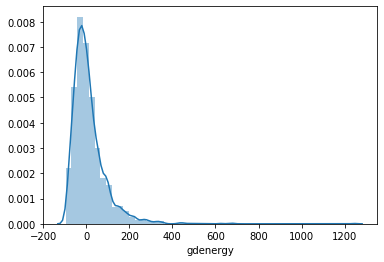

In [46]:
sns.distplot(df['gdenergy'], hist=True)

There are some negative shifts here.

C:\Users\nroy0\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


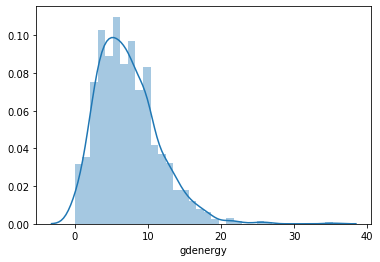

C:\Users\nroy0\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


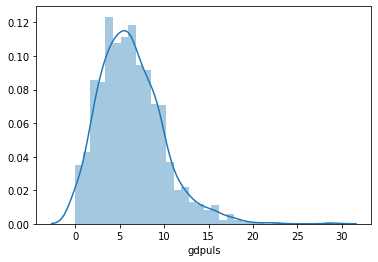

In [47]:
sns.distplot(np.sqrt(df['gdenergy']), hist=True)
plt.show()
sns.distplot(np.sqrt(df['gdpuls']), hist=True)

.. and trying out standard transformation

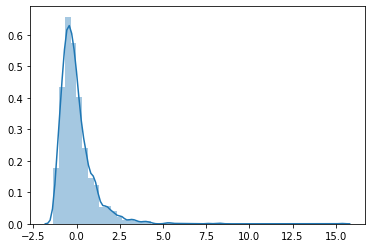

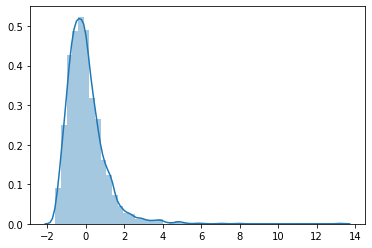

In [48]:
sns.distplot(stats.zscore(df['gdenergy']), hist=True)
plt.show()
sns.distplot(stats.zscore(df['gdpuls']), hist=True)

#### energy and maxenergy

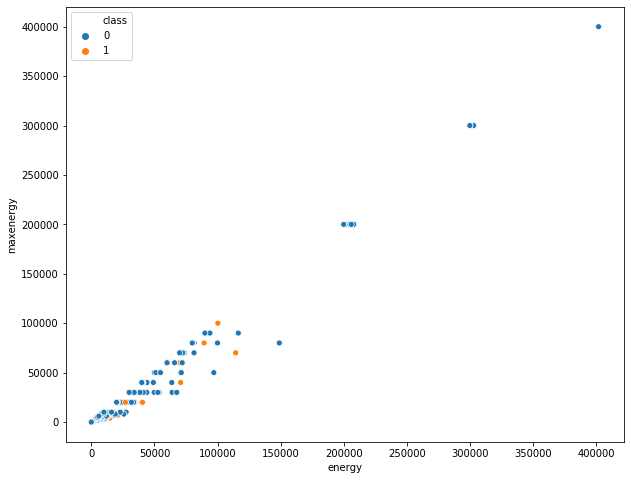

In [49]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x='energy', y='maxenergy', hue='class', data=df)

A strong linear relationship is here betwen the two features.

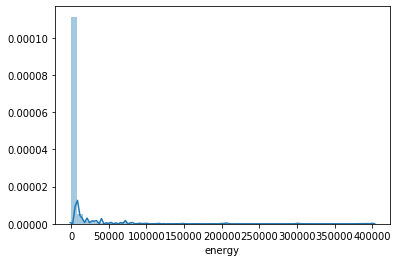

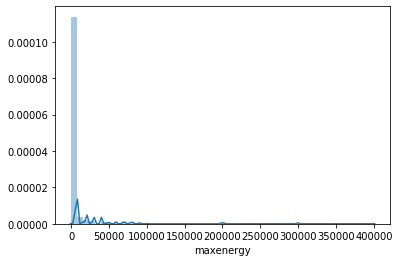

In [50]:
sns.distplot(df['energy'], hist=True)
plt.show()
sns.distplot(df['maxenergy'], hist=True)
plt.show()

There is a lot of zeroes in this feature. Therefore, using zscore again to check the distribution.

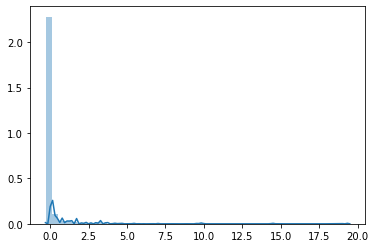

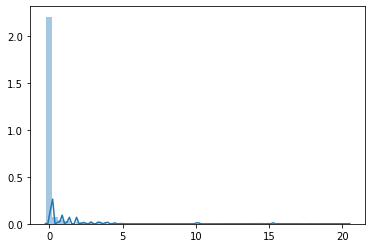

In [51]:
sns.distplot(stats.zscore(df['energy']), hist=True)
plt.show()
sns.distplot(stats.zscore(df['maxenergy']), hist=True)
plt.show()

In [52]:
stats.zscore(df['energy']).mean(), stats.zscore(df['maxenergy']).mean()

(2.1998227113315797e-17, -1.0999113556657898e-17)

Trying log transformation after adding a constant 1

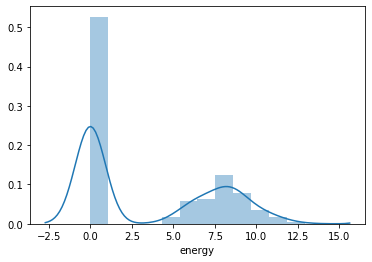

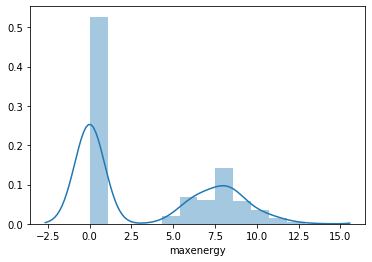

In [53]:
sns.distplot(np.log(df['energy']+1), hist=True)
plt.show()
sns.distplot(np.log(df['maxenergy']+1), hist=True)
plt.show()

For energy and maxenergy, there is little differences in the distributions as in the plots and there is almost 100% correlation in the data - so I would drop maxenergy and keep energy only. I would translate using a constant 1 and then use log transformation on energy.

**Summarizing the chosen transformation in a dictionary**

In [54]:
def shifted_log_func(df_col):
    return np.log(1 + df_col) 

In [55]:
dict_num_cols_trnsfm = {'genergy': np.log,
                        'gpuls' : np.log,
                        'gdenergy': stats.zscore,
                        'gdenergy': stats.zscore, 
                        'energy': shifted_log_func}

In [56]:
for col_names, transfm_func in dict_num_cols_trnsfm.items():
    df['scaled_' + col_names] = transfm_func(df[col_names])
df.drop(columns=col_list_numerical, inplace=True)
df.head()

,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,class,seismic_enc_0,seismoacoustic_enc_0,seismoacoustic_enc_1,seismoacoustic_enc_2,shift_enc_0,ghazard_enc_0,ghazard_enc_1,ghazard_enc_2,scaled_genergy,scaled_gpuls,scaled_gdenergy,scaled_energy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.627734,3.871201,-1.050711,0.000000
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.596962,3.496508,-1.025805,7.601402
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,8.993427,3.401197,-1.162786,0.000000
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,10.268825,5.141664,-0.440526,8.006701
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,9.444622,4.043051,-0.938636,0.000000


## Splitting Traning and Test data using Stratified Shuffle Split

In [57]:
df.shape

(2584, 21)

In [58]:
list(set(df.columns) - set([label]))

['ghazard_enc_0',
 'shift_enc_0',
 'nbumps5',
 'scaled_genergy',
 'scaled_gpuls',
 'scaled_energy',
 'nbumps6',
 'seismoacoustic_enc_1',
 'nbumps3',
 'scaled_gdenergy',
 'nbumps2',
 'nbumps',
 'nbumps89',
 'seismic_enc_0',
 'ghazard_enc_2',
 'ghazard_enc_1',
 'nbumps7',
 'seismoacoustic_enc_2',
 'nbumps4',
 'seismoacoustic_enc_0']

In [60]:
# OLD CODE FOR DEMO
X_demo = df[list(set(df.columns) - set([label]))]
y_demo1 = df[label]
y_demo2 = df[[label]]
X_demo.shape, y_demo1.shape, y_demo2.shape

((2584, 20), (2584,), (2584, 1))

In [61]:
type(X_demo), type(y_demo1), type(y_demo2)

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [62]:
X = df[list(set(df.columns) - set([label]))].values
y = df[label]
X.shape, y.shape

((2584, 20), (2584,))

In [63]:
type(X), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [64]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20)

In [65]:
for train_idx, test_idx in stratified_split.split(X, y):
    print(len(train_idx))
    print(len(test_idx))
    y_train= y[train_idx]
    X_train = X[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

len(X_train), len(y_train), len(X_test), len(y_test)

2067
517


(2067, 2067, 517, 517)

## Applying ML model to Predict Hazardrous Seismic Bump

### K-Neighbors Classifier using Stratified KFold Cross Validation

In [66]:
model = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=10)

In [67]:
'''
Demo of split using original features and label columns
split is 90-10
'''

for train, test in skf.split(X, y):
    print(len(train))
    print(y[train].value_counts()/len(train))
    print('----')
    print(len(test))
    print(y[test].value_counts()/len(test))
    print('----')
    break

2325
0    0.934194
1    0.065806
Name: class, dtype: float64
----
259
0    0.934363
1    0.065637
Name: class, dtype: float64
----


#### Using cross_val_score for performance metrics

In [68]:
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=skf, n_jobs=-1, error_score='raise')
scores

array([0.92753623, 0.91304348, 0.93719807, 0.92753623, 0.91304348,
       0.92753623, 0.92753623, 0.9368932 , 0.93203883, 0.94174757])

In [69]:
scores.mean(), scores.std()

(0.9284109563341307, 0.009030880505340656)

In [70]:
scores = cross_val_score(model, X_train, y_train, scoring='f1_micro', cv=skf, n_jobs=-1, error_score='raise')
scores.mean(), scores.std()

(0.9284109563341307, 0.009030880505340656)

In [71]:
scores = cross_val_score(model, X_train, y_train, scoring='f1_macro', cv=skf, n_jobs=-1, error_score='raise')
scores.mean(), scores.std()

(0.5128418876172458, 0.04277954556023717)

In [72]:
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=skf, n_jobs=-1, error_score='raise')
scores.mean(), scores.std()

(0.06291316526610644, 0.08234648119635388)

I was getting an error "pos_label=1 is not a valid label: array(['0', '1'], dtype='<U1')" which I resolved by typecasting the labels into integers. This blocked me for 1 whole day sicne I had run the code before which successfully ran. This is when i noticed one-hot encoders transformed all the features I fed into it were transformed to float including my label column. So when I ran the code, it worked. But when I  excluded it, the object type of the label column caused this trouble.

In [73]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

#### Using cross_validate for performance metrics

In [74]:
scores = cross_validate(model, X_train, y_train, scoring=['precision', 'recall', 'f1'], cv=skf, n_jobs=-1, error_score='raise')
scores.keys()

dict_keys(['fit_time', 'score_time', 'test_precision', 'test_recall', 'test_f1'])

In [75]:
scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_f1'].mean()

(0.2833333333333333, 0.03736263736263736, 0.06291316526610644)

In [76]:
scoring = {'precision': 'precision', 
           'recall': 'recall',
           'roc_auc': 'roc_auc'}

In [77]:
scores = cross_validate(model, X_train, y_train, scoring=scoring, cv=10, return_train_score=True)
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_precision',
 'test_recall',
 'test_roc_auc',
 'train_precision',
 'train_recall',
 'train_roc_auc']

In [78]:
scores['test_precision'].mean(), scores['test_recall'].mean(), scores['test_roc_auc'].mean()

(0.2833333333333333, 0.03736263736263736, 0.6129167397956458)

#### Tuning model using Grid Search CV using 'Precision'

In [100]:
n_neighbors = [1, 2, 3, 4, 5]
weights = ['uniform', 'distance']
algorithm = ['auto']

param_grid = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)

In [166]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=StratifiedKFold(shuffle=True), 
                    scoring=['precision'],
                    refit='precision',
                    verbose=10)

In [167]:
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.174, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.192, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.138, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.115, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.125, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV]  algorithm=auto, n_neighbors=1, weights=distance, precision=0.174, total=   0.0s
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=1.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.500, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, precision=0.174, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, precisio

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


In [169]:
grid_result.cv_results_

{'mean_fit_time': array([0.00749898, 0.00709791, 0.00720897, 0.00661278, 0.00680313,
        0.00660892, 0.00739679, 0.0068336 , 0.00702534, 0.00680685]),
 'std_fit_time': array([0.00168221, 0.00101227, 0.00040144, 0.00079562, 0.00038804,
        0.00049401, 0.00046959, 0.00075472, 0.00108296, 0.00077235]),
 'mean_score_time': array([0.0144012 , 0.00500631, 0.01520929, 0.0060009 , 0.01560407,
        0.00659871, 0.01461163, 0.00779266, 0.01619816, 0.00700345]),
 'std_score_time': array([1.35609420e-03, 2.72261073e-05, 9.74807972e-04, 6.40086522e-04,
        1.38335503e-03, 4.89420790e-04, 5.08285566e-04, 7.46846546e-04,
        2.63806333e-03, 6.02892658e-06]),
 'param_algorithm': masked_array(data=['auto', 'auto', 'auto', 'auto', 'auto', 'auto', 'auto',
                    'auto', 'auto', 'auto'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_neighbors': maske

In [170]:
grid_result.best_estimator_

KNeighborsClassifier(n_neighbors=2)

In [171]:
grid_result.best_score_

0.3

In [172]:
n_neighbors, weights = grid_result.best_estimator_.n_neighbors , grid_result.best_estimator_.weights

In [173]:
n_neighbors, weights

(2, 'uniform')

In [174]:
grid_result.scorer_

{'precision': make_scorer(precision_score, average=binary)}

In [175]:
grid_result.n_splits_

5

In [176]:
model = grid_result.best_estimator_

In [177]:
model

KNeighborsClassifier(n_neighbors=2)

In [189]:
file_name = 'seismic_bump_k_neighbors_'+ str(n_neighbors) + '_' + weights + '_' + list(grid_result.scorer_.keys())[0]+'.sav'
joblib.dump(model, file_name)

['seismic_bump_k_neighbors_2_uniform_precision.sav']

In [179]:
y_pred = model.predict(X_test)

In [180]:
y_pred.shape

(517,)

In [181]:
confusion_matrix(y_test, y_pred)

array([[478,   5],
       [ 33,   1]], dtype=int64)

In [182]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
(tn, fp, fn, tp)

(478, 5, 33, 1)

In [183]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9264990328820116, 0.029411764705882353, 0.16666666666666666, 0.05)

That is the model could only identify ~2% of hazardrous seismic bumps out of all actual hazardrous seismic bumps while only ~16% of the predicted hazardrous seismic bumps were actually hazardrous. Needless to say, the model ain't too good.

However, you can clearly see what is classically called as "Accuracy Paradox" that rises due to an unabalanced dataset and this is a demonstartion of how most of the negatives were deetcted correctly, which shot up the accuracy to 92%.

In the next few cells I have retrained using different performance metrics to measure the model fit.

#### Tuning model using Grid Search CV using 'Precision'  again

In [196]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=StratifiedKFold(shuffle=True), 
                    scoring=['precision'],
                    refit='precision',
                    verbose=10)
grid_result = grid.fit(X_train, y_train)
n_neighbors, weights = grid_result.best_estimator_.n_neighbors , grid_result.best_estimator_.weights
file_name = 'seismic_bump_k_neighbors_'+ str(n_neighbors) + '_' + weights + '_' + list(grid_result.scorer_.keys())[0]+'.sav'
joblib.dump(model, file_name)
print(grid_result.best_score_)
print(grid_result.best_estimator_)
y_pred = grid_result.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.273, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.143, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.138, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.182, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.190, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV]  algorithm=auto, n_neighbors=1, weights=distance, precision=0.273, total=   0.0s
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=1, weights=distance, precision=0.190, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.250, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.250, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.667, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.500, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, precisio

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


(0.9323017408123792,
 0.029411764705882353,
 0.3333333333333333,
 0.05405405405405406)

Slight improvement in the precision of the model while in recall there is no improvement. This time the model predicted ~33% of all there predicted hazardrous seismic bumps correctly.

#### Tuning model using Grid Search CV using 'Recall' 

In [198]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=StratifiedKFold(shuffle=True), 
                    scoring=['recall'],
                    refit='recall',
                    verbose=10)
grid_result = grid.fit(X_train, y_train)
n_neighbors, weights = grid_result.best_estimator_.n_neighbors , grid_result.best_estimator_.weights
file_name = 'seismic_bump_k_neighbors_'+ str(n_neighbors) + '_' + weights + '_' + list(grid_result.scorer_.keys())[0]+'.sav'
joblib.dump(model, file_name)
print(grid_result.best_score_)
print(grid_result.best_estimator_)
y_pred = grid_result.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, recall=0.222, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, recall=0.071, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, recall=0.111, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, recall=0.111, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, recall=0.148, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV]  algorithm=auto, n_neighbors=1, weights=distance, recall=0.222, total=   0.0s
[CV] algorithm=auto,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=2, weights=uniform, recall=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, recall=0.037, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, recall=0.037, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, recall=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, recall=0.222, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, recall=0.071, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, recall=0.111, total=   0.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


(0.9052224371373307, 0.14705882352941177, 0.2, 0.16949152542372883)

With recall as the performance metric, the overall performance has improved where 14% of of the actual hazardrous seismic bumps were correctly predicted while 20% out of all those predicted as hazardrous were correct. f1 score also jumped up twice from 0.054 to 0.16 but the model far from being actually good.

#### Tuning model using Grid Search CV using 'f1' 

In [199]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=StratifiedKFold(shuffle=True), 
                    scoring=['f1'],
                    refit='f1',
                    verbose=10)
grid_result = grid.fit(X_train, y_train)
n_neighbors, weights = grid_result.best_estimator_.n_neighbors , grid_result.best_estimator_.weights
file_name = 'seismic_bump_k_neighbors_'+ str(n_neighbors) + '_' + weights + '_' + list(grid_result.scorer_.keys())[0]+'.sav'
joblib.dump(model, file_name)
print(grid_result.best_score_)
print(grid_result.best_estimator_)
y_pred = grid_result.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, f1=0.160, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, f1=0.080, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, f1=0.160, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, f1=0.196, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, f1=0.194, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV]  algorithm=auto, n_neighbors=1, weights=distance, f1=0.160, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=1, weights=distance, f1=0.194, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, f1=0.071, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, f1=0.062, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, f1=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, f1=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, f1=0.062, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, f1=0.160, total=   0.0s
[CV] algorithm=auto, n_nei

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


(0.9052224371373307, 0.14705882352941177, 0.2, 0.16949152542372883)

Same results as that of f1 for recall.

#### Tuning model using Grid Search CV using 'Precision' again

In [207]:
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid, 
                    cv=StratifiedKFold(shuffle=True), 
                    scoring=['precision'],
                    refit='precision',
                    verbose=10)
grid_result = grid.fit(X_train, y_train)
n_neighbors, weights = grid_result.best_estimator_.n_neighbors , grid_result.best_estimator_.weights
file_name = 'seismic_bump_k_neighbors_'+ str(n_neighbors) + '_' + weights + '_' + list(grid_result.scorer_.keys())[0]+'.sav'
print(file_name)
joblib.dump(model, file_name)
print(grid_result.best_score_)
print(grid_result.best_estimator_)
y_pred = grid_result.best_estimator_.predict(X_test)

accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred), f1_score(y_test, y_pred)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.100, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.200, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.208, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.080, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=1, weights=uniform, precision=0.150, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV]  algorithm=auto, n_neighbors=1, weights=distance, precision=0.100, total=   0.0s
[C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=auto, n_neighbors=1, weights=distance, precision=0.150, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.250, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.333, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.250, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=2, weights=uniform, precision=0.000, total=   0.0s
[CV] algorithm=auto, n_neighbors=2, weights=distance .................
[CV]  algorithm=auto, n_neighbors=2, weights=distance, precisio

C:\Users\nroy0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  algorithm=auto, n_neighbors=2, weights=distance, precision=0.150, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, precision=0.167, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, precision=0.286, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, precision=0.222, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, precision=0.100, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV]  algorithm=auto, n_neighbors=3, weights=uniform, precision=0.222, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=distance .................
[CV]  algorithm=auto, n_neighbors=3, weights=distance, precisio

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


(0.9323017408123792,
 0.029411764705882353,
 0.3333333333333333,
 0.05405405405405406)

A third iteration yielded the same results here with n_neighbors=4.